# Instituto Superior de Engenharia de Lisboa

## Licenciatura em Engenharia Informática e Multimédia

# Processamento Digital de Sinais

## Trabalho Prático 2
    
     
    Docente: Isabel Martins
   
    Realizador por:
    43498 Roman Ishchuk
    48965 Pedro Silva
    49247 Cláudia Sequeira
    
   
    16/06/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.io.wavfile as wav
import statistics as st
import statsmodels.api as sm
from scipy.signal import find_peaks

from IPython.display import Audio, display

# I. Processamento de Sinais e Classificação Automática


## a) Analise clips audio correspondentes a assobios e palmas e descreva caracteristicas no dominio do tempo e frequência que caracterizem este tipo de ficheiros. Sugere-se calcular parametros estatisticos associados ao dominio da frequência de cada sinal.


In [2]:
#leitura do ficheiro xxx.wav
#o sampling rate é guardado na variável rate
#o conteúdo do ficheiro é guardado na variável data
rate,data = wav.read("Palmas.wav")
#guardamos todo o conteúdo na variável palmas
palmas = data[:,0]
#criamos o display de audio com as nossas variáveis
Audio(data=palmas, rate=rate)


In [3]:
rate,data = wav.read("Assobio.wav")
assobio=data[:,0]
Audio(data=assobio, rate=rate)

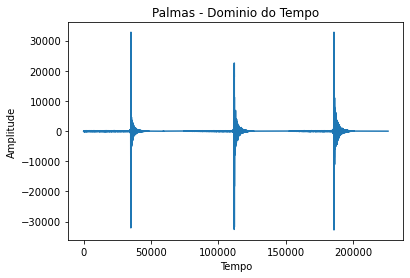

In [4]:
# plot das ondas de som das palmas
plt.title('Palmas - Dominio do Tempo')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.plot(palmas)

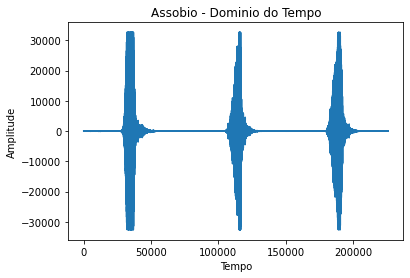

In [5]:
plt.title('Assobio - Dominio do Tempo')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.plot(assobio)

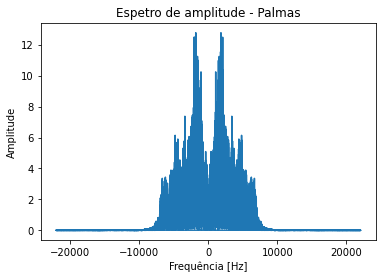

In [6]:
#fazemos a transformada de fourier das palmas, e dividimos pelo 
#compimento da variável, para mostrar a amplitude real
palmasEspetro= np.fft.fft(palmas) / len(palmas)
#calculamos as frequências do espetro
fpalmas = np.fft.fftfreq(len(palmasEspetro), 1.0/rate)
#calculamos o módulo do espetro
amp_palmasEspetro = np.abs(palmasEspetro)

#plot do espetro de amplitude
plt.title('Espetro de amplitude - Palmas')
plt.ylabel('Amplitude')
plt.xlabel('Frequência [Hz]')
plt.plot(fpalmas, amp_palmasEspetro)

(array([1.72731e+05, 2.53130e+04, 1.47840e+04, 6.56000e+03, 3.06800e+03,
        1.66800e+03, 9.18000e+02, 4.60000e+02, 2.04000e+02, 8.60000e+01]),
 array([7.23787358e-05, 1.27688649e+00, 2.55370059e+00, 3.83051470e+00,
        5.10732880e+00, 6.38414291e+00, 7.66095702e+00, 8.93777112e+00,
        1.02145852e+01, 1.14913993e+01, 1.27682134e+01]),
 <BarContainer object of 10 artists>)

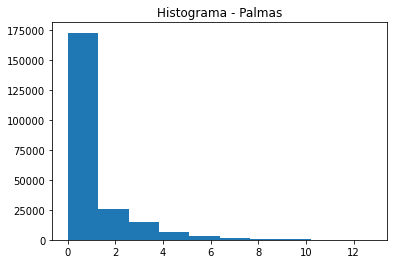

In [7]:
#criação do histograma da dispersão do espetro de amplitude
plt.title('Histograma - Palmas')
plt.hist(amp_palmasEspetro,10)

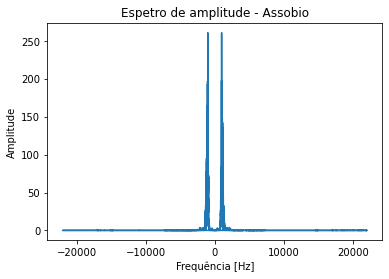

In [8]:
assobioEspetro= np.fft.fft(assobio) / len(assobio)
fassobio = np.fft.fftfreq(len(assobioEspetro), 1.0/rate)
amp_assobioEspetro = np.abs(assobioEspetro)


plt.title('Espetro de amplitude - Assobio')
plt.ylabel('Amplitude')
plt.xlabel('Frequência [Hz]')
plt.plot(fassobio, np.abs(amp_assobioEspetro))

(array([2.22088e+05, 1.38400e+03, 1.14600e+03, 4.12000e+02, 2.76000e+02,
        2.22000e+02, 1.34000e+02, 6.60000e+01, 3.20000e+01, 3.20000e+01]),
 array([4.83961802e-06, 2.61251731e+01, 5.22503413e+01, 7.83755095e+01,
        1.04500678e+02, 1.30625846e+02, 1.56751014e+02, 1.82876182e+02,
        2.09001351e+02, 2.35126519e+02, 2.61251687e+02]),
 <BarContainer object of 10 artists>)

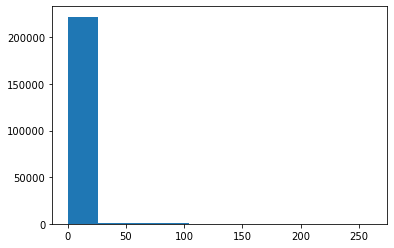

In [9]:
plt.hist(amp_assobioEspetro, 10)

Conseguimos averiguar, que os espetros de amplitude diferem um bom bocado. As palmas criam um espetro de amplitudes mais disperso que o assobio.

## b) Desenvolva uma classificador que consiga classificar automáticamente ficheiros de cada um dos tipos.

Encontrámos algumas maneiras de distinguir as palmas dos assobios.
Como os assobios são mais agudos que as palmas (que são mais graves), decidimos distinguir o conteúdo do ficheiro fornecido pela amplitude máxima. Depurámo-nos, que as palmas não têm uma amplitude maior que 50, mas mesmo assim, demos uma margem.

In [10]:
#método classificador que vai classificar como assobio ou palmas
def classificador(data):
    #cálculo do pico máximo da amplitude
    result = np.max(data)
    if(abs(result) < 100):
        print('São palmas')
        return "Amplitude máxima:"  + str(result)
    else:
        print('São assobios')
        return "Amplitude máxima:"  + str(result)

In [11]:
classificador(amp_palmasEspetro)

São palmas


'Amplitude máxima:12.768213444393043'

In [12]:
classificador(amp_assobioEspetro[(fassobio > 0.)])

São assobios


'Amplitude máxima:261.25168700169195'

## c) Para os ficheiros de assobio calcule o pitch associado.

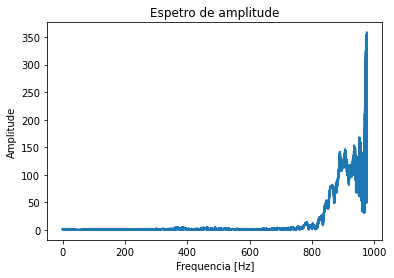

In [13]:
#cálculo do comprimento do conteudo do ficheiro
N = len(assobio)
t = N / rate
#cálculo da transformada de fourier, a partir do 0
Y_k = np.fft.fft(assobio)[0:int(N/2)]/N
#duplicamos
Y_k[1:] = 2*Y_k[1:]
#cálculo do módulo da transformada
A = np.abs(Y_k)

#cálculo da frequência dominante
f = rate * np.arange((N/2)) / N;

#plot do pico da amplitude na sua frequência
fig,ax = plt.subplots()
plt.plot(f[0:5000], A[0:5000], linewidth=2)
plt.title('Espetro de amplitude')
plt.ylabel('Amplitude')
plt.xlabel('Frequencia [Hz]')
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


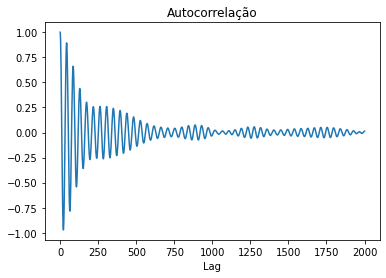

In [14]:
#cálculo da autocorrelação com um máximo de 2000 números de lag
auto = sm.tsa.acf(assobio, nlags=2000)
plt.title('Autocorrelação')
plt.xlabel('Lag')
plt.plot(auto)

Como podemos averiguar no plot da autocorrelação, o pico no primeiro lag é o maior de todos.

In [15]:
#Encontramos os picos da autocorrelação
peaks = find_peaks(auto)[0] 
#escolhemos o primeiro pico como o nosso componente pitch
lag = peaks[0]
#calculamos o pitch, transformando o lag em frequência
pitch = rate / lag # Transform lag into frequency

print('Pitch: ' + str(pitch) + ' Hz')

Pitch: 1050.0 Hz


## d) Demonstre o funcionamento com um conjunto de ficheiros de teste calculando a precisão do classficador.

Criámos mais 6 audios, para testar o classificador. Deixamos os nomes dos ficheiros visíveis, para uma fácil verificação.

In [16]:
rate,data = wav.read("Palmas2.wav")
palmas2 = data[:,0]
Audio(data=palmas2, rate=rate)

In [17]:
rate,data = wav.read("Palmas3.wav")
palmas3 = data[:,0]
Audio(data=palmas3, rate=rate)

In [18]:
rate,data = wav.read("Palmas4.wav")
palmas4 = data[:,0]
Audio(data=palmas4, rate=rate)

In [19]:
rate,data = wav.read("Assobio2.wav")
assobio2 = data[:,0]
Audio(data=assobio2, rate=rate)

In [20]:
rate,data = wav.read("Assobio3.wav")
assobio3 = data[:,0]
Audio(data=assobio3, rate=rate)

In [21]:
rate,data = wav.read("Assobio4.wav")
assobio4 = data[:,0]
Audio(data=assobio4, rate=rate)

In [22]:
palmasEspetro2= np.fft.fft(palmas2) / len(palmas2)
classificador(np.abs(palmasEspetro2))

São palmas


'Amplitude máxima:12.819449780418024'

In [23]:
assobioEspetro2= np.fft.fft(assobio2) / len(assobio2)
classificador(np.abs(assobioEspetro2))

São assobios


'Amplitude máxima:1132.8247278699378'

In [24]:
palmasEspetro3= np.fft.fft(palmas3) / len(palmas3)
classificador(np.abs(palmasEspetro3))

São palmas


'Amplitude máxima:21.72097212497658'

In [25]:
assobioEspetro3= np.fft.fft(assobio3) / len(assobio3)
classificador(np.abs(assobioEspetro3))

São assobios


'Amplitude máxima:441.677503746466'

In [26]:
assobioEspetro4= np.fft.fft(assobio4) / len(assobio4)
classificador(np.abs(assobioEspetro4))

São assobios


'Amplitude máxima:1048.9105240400008'

In [27]:
palmasEspetro4= np.fft.fft(palmas4) / len(palmas4)
classificador(np.abs(palmasEspetro4))

São palmas


'Amplitude máxima:27.625644771226373'

Conseguimos concluir, que o nosso classificador funciona bem, sem falhas.

### <center> 2. Filtragem</center>

#### a) Implemente de forma independente os filtros F BCF(g, N) e AP(g, N). Caracterize-os no dominínio da frequência e aplique a alguns sinais para testar a sua funcionalidade.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as ss
from IPython.display import Audio, display

No método FBCF pretende-se implementar o Comb-Filter com a seguinte expressão: $FBCF(g,N)$ = $\frac{1}{1-gz^{-N}}$

Para podermos caractrizar o filtro dominínio da frequência fizemos uma condição que, caso não haja sinal, é nos retornado a frequencia normalizada computada pela resposta em frequencia. Caso exista um sinal é aplicado o filtro, com os valores aplicados.

In [29]:
def FBCF(g, N, sinal):
    bk = [1]
    ak = np.hstack([1, np.zeros(N-1), -(g)])
    
    #para fazer plot do nosso filtro sem ser aplicado a um sinal
    if sinal is None:
        return ss.freqz(bk,ak) #returns frequencia normalizadas
                               # e resposta em frequencia
    
    return ss.lfilter(bk, ak, sinal)
                            # returns o novo sinal com os coeficientes
                            # definidos

### Funcionamento do Comb-Filter, no dominínio da frequência

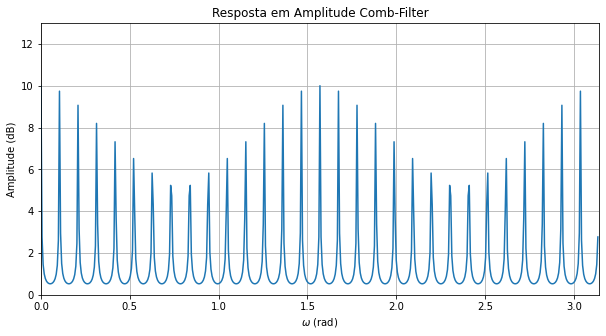

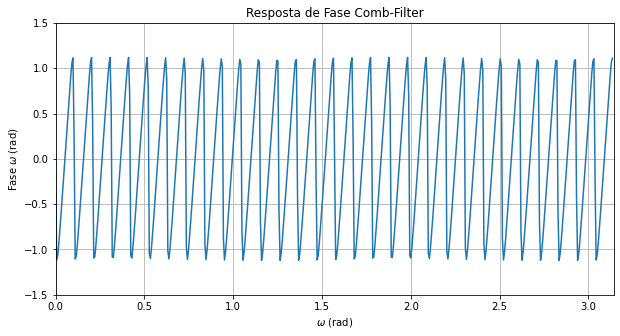

In [30]:
n = np.arange(10000)
#definição da frequencia amostragem
Fs = 2000
# definição do g (entre 0 e 1 para manter a estabilidade)
g = 0.9

# Calculo do delay
delayComb = 0.03 #30ms
N = int(Fs * delayComb)

# plot do funcionamento do comb-filter (sem sinal)
w, h = FBCF(g, N, None)
#w = frequencia normalizadas
#h = resposta em frequencia

plt.subplots(figsize=(10, 5))
plt.plot(w, np.abs(h))
plt.axis([0,np.pi, 0, 13])
plt.xlabel(r'$\omega$ (rad)')
plt.ylabel('Amplitude (dB)')
plt.title('Resposta em Amplitude Comb-Filter')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.axis([0,np.pi, -1.5, 1.5])
plt.title('Resposta de Fase Comb-Filter') 
plt.xlabel(r'$\omega$ (rad)')
plt.ylabel('Fase ' + r'$\omega$ (rad)')
plt.plot(w,np.angle(h))
plt.grid()
plt.show()


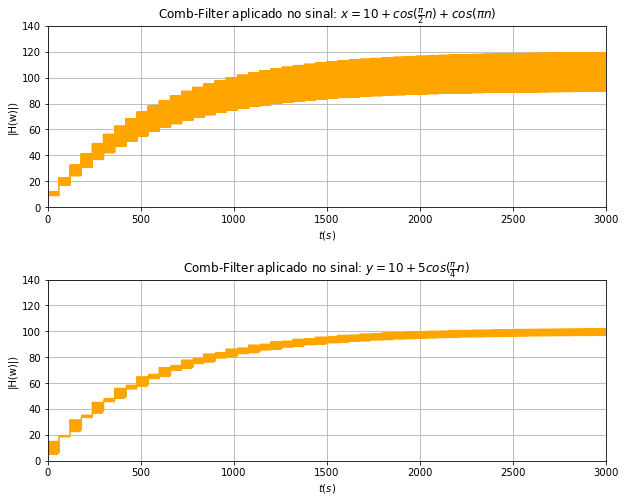

In [31]:
# plot do funcionamento do comb-filter ( C/ SINAL)
x = 10 + np.cos(np.pi/2*n)+np.cos(np.pi*n)
Hw = FBCF(g, N, x)

y = 10 + 5*np.cos(np.pi/4*n)
Hw2 = FBCF(g, N, y)


#criam-se os subplots
fig, ax = plt.subplots(2, 1, figsize=(10,8))
plt.subplots_adjust(hspace=0.4)

ax[0].plot(n, Hw,color='orange')
ax[0].axis([0 , 3000 ,0 , 140])
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel('|H(w)|)')
ax[0].grid()
ax[0].set_title('Comb-Filter aplicado no sinal: ' + r'$x = 10 + cos$(' 
                + r'$\frac{π}{2}n)+cos$(' + r'$πn)$')

ax[1].plot(n, Hw2,color='orange')
ax[1].axis([0 , 3000 ,0 , 140])
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel('|H(w)|)')
ax[1].grid()
ax[1].set_title('Comb-Filter aplicado no sinal: ' +
                r'$y = 10 + 5cos$(' + r'$\frac{π}{4}n$)')
plt.show()


No método AP pretende-se implementar um All Pass Filter com a seguinte expressão:<br>
$AP (g, N )$ = $\frac{-g + z^{-N}}{1-gz^{-N}}$

A mesma condição aplicada no método FBCF foi aplicada no método AP, para poder fazer o plot do filtro sem ter um sinal. 

In [32]:
# Allpass
def AP(g, N, sinal):
    bk = np.hstack([-(g),np.zeros(N-1), 1])
    ak = np.hstack([1,np.zeros(N-1), -(g)])
    
  #permite-nos fazer plot do nosso filtro sem ser aplicado a um sinal
    if sinal is None:
        return ss.freqz(bk,ak) #returns frequencia normalizadas
                               # e resposta em frequencia
    
    return ss.lfilter(bk, ak, sinal)
                            # returns o novo sinal com os coeficientes
                            # definidos

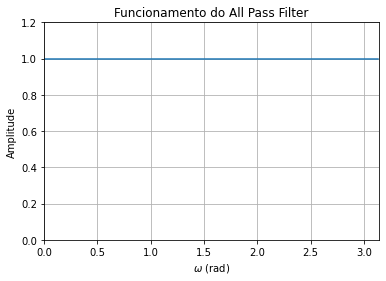

In [33]:
# calculo do delay
delayAllPass = 0.004 #5ms
N = int(Fs*delayAllPass)


# plot do funcionamento do all pass filter
w, Hw = AP(g, N, None)
plt.plot(w, np.abs(Hw))
plt.axis([0,np.pi,0,1.2])
plt.xlabel(r'$\omega$ (rad)')
plt.ylabel('Amplitude')
plt.title("Funcionamento do All Pass Filter")
plt.grid()
plt.show()

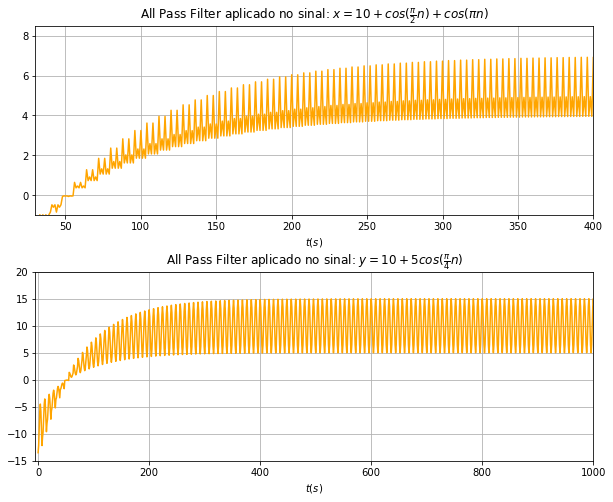

In [34]:
# plot do funcionamento do All Pass Filter (Com Sinal)
x = 5 + np.cos(np.pi/2*n)+np.cos(np.pi*n)
Hw = AP(g, N, x)

y = 10 + 5*np.cos(np.pi/4*n)
Hw2 = AP(g, N, y)

g = 1
N = int(Fs*delayAllPass)


#criam-se os subplots
fig, ax = plt.subplots(2, 1, figsize=(10,8))
plt.subplots_adjust(hspace=0.3)

ax[0].plot(n, Hw,color='orange')
ax[0].axis([30 , 400 ,-1 , 8.5])
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel('')
ax[0].grid()
ax[0].set_title('All Pass Filter aplicado no sinal: ' + r'$x = 10 + cos$(' 
                + r'$\frac{π}{2}n)+cos$(' + r'$πn)$')

ax[1].plot(n, Hw2,color='orange')
ax[1].axis([-5 , 1000 ,-15 , 20])
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel('')
ax[1].grid()
ax[1].set_title('All Pass Filter aplicado no sinal: ' +
                r'$y = 10 + 5cos$(' + r'$\frac{π}{4}n$)')
plt.show()



#### b) Escolha um dos modelos de reverberação existente na literatura baseado nos filtros anteriores e implemente-o.

Utilizando o modelo de reverberação digital proposto por Schroeder vamos implementar um filtro  de reverberação. O modelo consistem em quatro Comb Filters em parapelo e dois All Pass Filters em serie.

O nosso método reverb recebe os coeficientes g do Comb Filter (gFBCF) e do All Pass Filter (gAllPass). Recebe também os seus delays que, caso sejam nulls são calculados no prórpio método.

In [35]:
#REVERB
# implementação do modelo de reverberação de Schroeder
def reverb(gCF, delayCF, gAllPass, delayAP, sinal, Fs):
    if delayAP is None:
        # calculo delay
        delayAP = int(Fs * delayAllPass)
        
    if delayCF is None:
        # calculo delay
        delayCF = int(Fs* delayComb)   

    # Sistemas em paralelo - Comb-filters
    x1 = FBCF(gCF, delayCF + 500 , sinal) #delay para o echo
    x2 = FBCF(gCF, delayCF + 750 , sinal)
    x3 = FBCF(gCF, delayCF + 1000, sinal)
    x4 = FBCF(gCF, delayCF + 1250, sinal)
    #filtros em paralelo somam
    x = x1 + x2 + x3 + x4 

    # Sistemas em serie - All Pass
    # aplica-se o sinal resultante do primeiro 
    # filtro ao segundo filtro
    ys1 = AP(gAllPass, delayAP, x)
    ys2 = AP(gAllPass, delayAP, ys1)
    
    return ys2

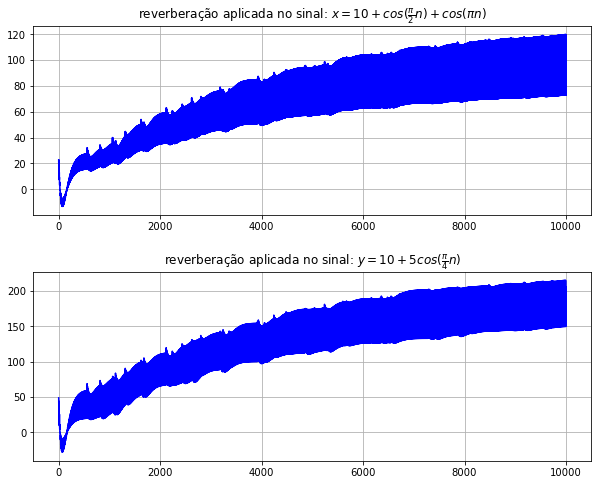

In [36]:
# Definição dos g's
gAllPass = 0.9
gFBCF = 0.8
x1 = 5 + np.cos(np.pi/2*n)+np.cos(np.pi*n)
y1 = 10 + 5*np.cos(np.pi/4*n)

x = reverb(gFBCF, None, gAllPass, None, x1, Fs)
y = reverb(gFBCF, None, gAllPass, None, y1, Fs)

#criam-se os subplots
fig, ax = plt.subplots(2, 1, figsize=(10,8))
plt.subplots_adjust(hspace=0.3)


ax[0].plot(n, x,color='blue')
ax[0].grid()
ax[0].set_title('reverberação aplicada no sinal: ' + r'$x = 10 + cos$(' 
                + r'$\frac{π}{2}n)+cos$(' + r'$πn)$')

ax[1].plot(n, y,color='blue')
ax[1].grid()
ax[1].set_title('reverberação aplicada no sinal: ' +
                r'$y = 10 + 5cos$(' + r'$\frac{π}{4}n$)')
plt.show()

### c) Defina parametros gi, Di que permitam simular uma geometria de um quarto, ou de uma sala de concerto. Teste o sistema com sinais de voz gravados por si.


In [37]:
# LEITURA DO SOM ORIGINAL
rateOriginal, dataOriginal = wav.read("voz.wav")

display(Audio(data = dataOriginal, rate = rateOriginal))

comprimento = dataOriginal.shape[0] / rateOriginal
t = np.linspace(0., comprimento, dataOriginal.shape[0])

In [38]:
#COMB FILTER
#valores d e g
gFBCF = 0.8
delayCF = int(0.045 * Fs)

#ALL PASS FILTER
#valores d e g
gAllPass = 0.9
delayAP = int(0.005 * Fs)

#CHAMADA METODO REVERB
sinal_reverb = reverb(gFBCF, delayCF, gAllPass, delayAP, dataOriginal, rateOriginal)

# NOVO FICHEIRO
wav.write("nao_abrir_fora_jupyter.wav", rateOriginal, sinal_reverb)

In [39]:
# LEITURA DO NOVO FICHEIRO
rate, dataReverb = wav.read("nao_abrir_fora_jupyter.wav")
display(Audio(data = dataReverb, rate = rate))

comprimento = dataReverb.shape[0] / rate
t2 = np.linspace(0., comprimento, dataReverb.shape[0])

NOTA: O ficheiro não pode ser aberto fora do jupyter. 

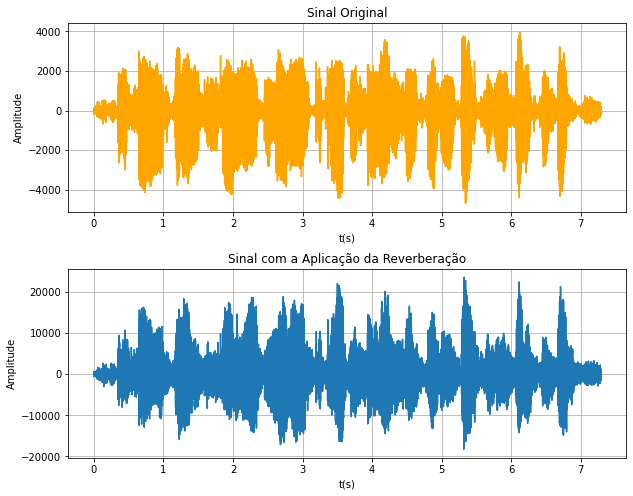

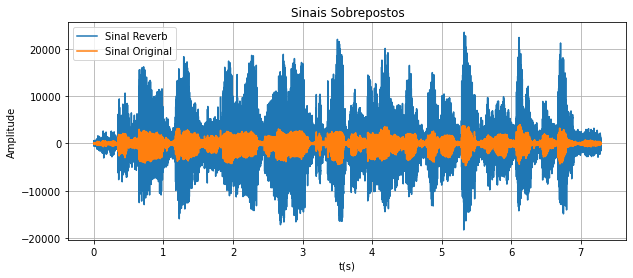

In [40]:
#criam-se os subplots
fig, ax = plt.subplots(2, 1, figsize=(10,8))
plt.subplots_adjust(hspace=0.3)

# SINAL ORIGINAL
ax[0].plot(t, dataOriginal ,color='orange')
ax[0].set_title('Sinal Original')
ax[0].set_xlabel('t(s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

# SINAL REVERB
ax[1].plot(t2, dataReverb)
ax[1].set_title('Sinal com a Aplicação da Reverberação')
ax[1].set_xlabel('t(s)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

# OS DOIS SINAIS SOBREPOSTOS
plt.figure(figsize=(10,4))
plt.plot(t2, dataReverb,label='Sinal Reverb')
plt.plot(t, dataOriginal,label='Sinal Original')
plt.title("Sinais Sobrepostos")
plt.xlabel('t(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()